<h1> Assignment 2</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: 14th MARCH 2019, by 16:00 </li>
    <li>**Hand-In Format**: Submitted to eClass, as notebook AND as exported PDF. Prefered naming convention being (studentid_A2.type). Let us save trees! </li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
    
    
<h2>Topics Covered: </h2>
<ul>
    This assignment covers two metaheuristic algorithms, GA and DE in the context of NP hard problems, with the traveling salesman as example. <br>
It requires basic understanding of Python (syntax, functions and classes functionalities), Random Search, Exhaustive Search, Genetic Algorithms and Differential Evolution Algorithms. <br>
    This assignment will compare your implementation of the Genetic Algorithm and the Differential Evolution Algorithm to Random Search and Exhaustive Search, based on walltime, iteration budget and achieved results as measures.
</ul>

<h2>Marking Table: </h2>
<ul>
    The assignment has 100 marks and 20 bonus points. <br>
    Again, roughly one third of the points can be done without any programming. <br>
    This time, the bonus is a little more involved and requires understanding of the topic. <br>
    We STILL encourage you to plot convergence curves and other helpful data to make your analysis easier! <br>
    
<h3>Task 1 (30): </h3>
<ul>
    <li> **(5+5)**: Explanation & Implementation of *Exhaustive Search* on the provided traveling salesman class. <br>
    <li> **(5+5)**: Explanation & Implementation of *Random Search* on the provided traveling salesman class. <br>
    <li> **(5+5)**: *Comparison* of those two search methods based on walltime, number of iterations and quality of results. *Explain* why the two other methods used in Assignment 1 cannot be applied for this problem. <br>
    </ul>
            
<h3>Task 2 (30): </h3>
<ul>
    <li> **(13)**: *Explaining* Genetic Algorithm with pseudocode, and delivering a pre-implementation asessment (tunable hyperparameters to consider, expected performance issues). <br>
    <li> **(12)**: *Implementing* the Genetic Algorithm in Python. <br>
    <li> **(BONUS 10)**: *Tune* your Genetic Algorithm (for example with hyperparameter & code adjustments) to achieve better results based on the established measures. *The 10 point standard will be the top performances of the class.* <br>
    </ul>

<h3>Task 3 (30): </h3>
<ul>
    <li> **(13)**: *Explaining* Differential Evolution Algorithm with pseudocode, and delivering a pre-implementation asessment (tunable hyperparameters to consider, expected performance issues). <br>
    <li> **(12)**: *Implementing* the Differential Evolution Algorithm in Python. <br>
    <li> **(BONUS 10)**: *Tune* your Differential Evolution AlgorithmGenetic Algorithm (for example with hyperparameter & code adjustments) to achieve better results based on the established measures. *The 10 point standard will be the top performances of the class.* <br>
    </ul>
    
<h3>Task 4 (20): </h3>
<ul>
    <li> **(20)** Comparing GA and DE performance to Exhaustive Search and Random Search with regards to walltime, iteration efficiency, stability, result quality, ease of implementation. <br>
        </ul>
</ul>
   
    
<h2> Python Help: </h2>
<ul>
<li> Measuring Execution time in Python: <url> https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution </url> <br>
</ul>


<h2> Task 0 / Preparation: </h2>
<ul>
    Read and run the cell below to initialize the traveling salesman (TS) class. Read and run the followup cell to see an illustrative example of it’s use. <br>
    
<h3> Rules: </h3>
<ul>
<li> **Travel in a loop:** The salesman travels in a loop. A loop of length X refers to a tour of X cities, where the salesman returns to the original city after visiting the last (a closed loop). <br>
    Example: for a loop of length four, the itinerary might look as follows [1, 2, 3, 4]. But, in reality, the class calculates the length with return to 1. <br>
<li> **No revisits:** Our salesman only visits each city once in a loop - *NOT [1, 2, 1, 2, 1]*! The class does not check for this itself, however. You have to make sure that this is obeyed.
    <li> **Grading:** algorithm performance should be tested for a loop of 6 cities, with 50 cities available. This does not mean, that the algorithms have to be tested on a problem of this scale, however ;-) <br>
</ul>

<h3> Functions: </h3>
<ul>
<li> initializing the TS creates a world with a given number of cities and resets the random seed. <br>
<li> random_tour creates a random tour in the world with a given number of stops. <br>
<li> new_tour creates a new tour, the inputs have to be the respective city numbers in a list of integers! <br>
<li> tour_length calculates the length of the currently planned tour with return to the initial starting point. <br>
<li> plot plots the city positions and the current tour.
    
</ul>

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
class traveling_salesman():
    def __init__(self, num_cities=50):
        # initialize the position of the cities
        random.seed(42)
        gridsize=100
        self.num_cities = num_cities
        self.cities = [random.sample(range(gridsize), 2) for x in range(self.num_cities)]

    def random_tour(self, num_stops=6):
        # take a random tour of a given length
        self.num_stops = num_stops
        self.tour = random.sample(range(self.num_cities), self.num_stops)
        return self.tour
        
    def new_tour(self, tour):
        # define a new tour
        tour = [int(_) for _ in tour]
        self.num_stops = len(tour)
        self.tour = tour
    
    def tour_length(self):
        # calculate tour length
        visited_cities = [self.cities[_] for _ in self.tour]
        for city in visited_cities:
            if city == visited_cities[0]:
                #start tour at the start
                traveled_distance = 0
                location = city
            else:
                # each travelled leg
                traveled_distance += np.sqrt((location[0] - city[0])**2 + (location[1] - city[1])**2)
                location = city
        # return to start
        traveled_distance += np.sqrt((visited_cities[0][0] - city[0])**2 + (visited_cities[0][1] - city[1])**2)
        return traveled_distance    

    def plot(self, tour=None):
        #plot the tour if you want to
        if tour is not None:
            self.tour = tour
        plt.plot([self.cities[_][0] for _ in range(self.num_cities)],
                 [self.cities[_][1] for _ in range(self.num_cities)],
                 linestyle='',
                 marker='*',
                markersize=11.0,
                color=[1,0,0])
        plt.plot([self.cities[self.tour[_ % self.num_stops]][0] for _ in range(self.num_cities)],
                 [self.cities[self.tour[_ % self.num_stops]][1] for _ in range(self.num_cities)],
                 'xb-')
        plt.show()

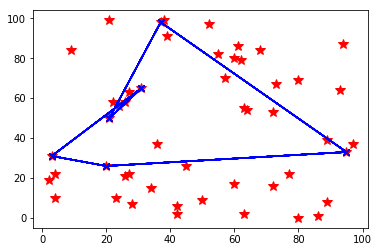

('length of first tour: ', 292.83050021792849)


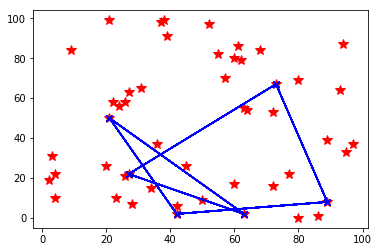

('length of first tour: ', 330.21918302709975)


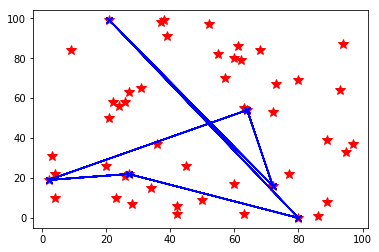

('length of first tour: ', 405.25809993959996)


In [281]:
salesman = traveling_salesman(num_cities=50) # initialize the TS's world with 50 cities

random_initial_tour = salesman.random_tour(num_stops=6) # create a random tour for the TS, plot and calculate length of tour
salesman.plot()
print("length of first tour: ", salesman.tour_length())


salesman.new_tour(tour = np.arange(6).tolist()) # assign a new tour to the TS, plot and calculate length
salesman.plot()
print("length of first tour: ", salesman.tour_length())

salesman.new_tour(tour = [1, 6, 7, 28, 42, 9]) # assign a new tour to the TS, plot and calculate length
salesman.plot()
print("length of first tour: ", salesman.tour_length())


<h2> Task 1: Benchmarks </h2>
In this task you will implement two benchmarks, which will be used for the rest of the assignment, Exhaustive Search and Random Search. You will then compare the two methods.
    <h3> T1Q1 (5+5): </h3> 
    <ul>
    **Explain** what exhaustive search is and what advantages and disatvantages it would have to use it on the Traveling Salesman.<br>
    **Implement** an exhaustive search to find the absolute cheapest 6 station loop for a traveling salesman with 50 available cities. Log iteration time, walltime and result! <br>
    ** (approx. 50 words) ** <br>
    **Tip:** Depending on implementation, this might take a while. It might be smart to start with a more restricted problem to test. <br>
    </ul>


T1Q1   


...
#### Exhastive search: 
#### advantages: will definitely give you the  optimal solution since you try all the combinations.The approach can be applied when the input size of the problem is not large.
#### disadvantages: the time complexity is exponential [O((n-1)!) for travelling n cities].When the problem size is large, it won't give you the result in short time. 
#### Implemens in order to find all possible solutions. this is a typical backtracking algorithm.(to structure exploring the search space with out duplicates) 


In [21]:
import itertools
# Your Code for T1Q1 Here
class exhastive_search_tsp():
    def __init__(self, num_cities=50):
        # initialize the position of the cities
        random.seed(42)
        gridsize=100
        self.num_cities = num_cities;
        #generate pesudo cities
        self.cities = [random.sample(range(gridsize), 2) for x in range(self.num_cities)]
        
        # store all possible combinations 
        self.all_combination=[];
        self.all_tour_length=[];
        
        # store the optimal tour and solution 
        self.optimal_solution = None;
        self.optimal_length = None;
        
        # store the distance matrix 
        self.matrix =[[None for x in range(self.num_cities)] for y in range(self.num_cities)] 
        
        self.iteration = 1;
    
    def generate_all_combination(self,num_stops= 6):
        # take a random tour of a given length
        self.num_stops = num_stops
        arr =[x for x in range(self.num_cities)] # 0~49 
        temp = [None]*self.num_stops
        self.combinationUtil(arr,temp,0,self.num_cities-1,0,self.num_stops) 
    
    def generate_all_combination_sum(self):
        self.init_matrix()
        for index,combination in enumerate(self.all_combination):# iterate all combination
            self.all_combination_sum.append(self.total_sum(combination))
        
    
    def total_sum(self, combination):
        total_sum = 0;
        for i in range(self.num_cities):
            for j in range(i,self.num_cities):
                if combination[i] != combination[j]:
                    total_sum += self.matrix[combination[i]][combination[j]]
        return total_sum 
    
    def combinationUtil(self,arr,data, start,end, index, r):
        '''
        # arr[] ---> Input Array 
        # data[] ---> Temporary array to 
        #         store current combination 
        # start & end ---> Staring and Ending 
        #             indexes in arr[] 
        # index ---> Current index in data[] 
        # r ---> Size of a combination  
        # to be printed  
        '''
        if (index == r): 
            self.all_combination.append(data[:]);# make sure to deep copy 
            return;

        i = start;  
        while(i <= end and end - i + 1 >= r - index): 
            data[index] = arr[i]; 
            self.combinationUtil(arr, data, i + 1, end, index + 1, r); 
            i += 1;
        
    def compute_optimal_tour(self):
        self.init_matrix()
        for combination in self.all_combination :# iterate all combination
            tour_tuple = list(itertools.permutations(combination[1:]))
            for tour in tour_tuple: # iterate all tour 
                tour = list(tour)
                tour.append(combination[0])
                tour_length = self.tour_length(tour)
                self.all_tour_length.append(tour_length) # append to all tours  in order to retreive 95% length 
                if(not self.optimal_length):
                    self.optimal_length = tour_length
                    self.optimal_solution = tour
                else:
                    if(tour_length < self.optimal_length):
                        self.optimal_length = tour_length
                        self.optimal_solution = tour
        
                if(self.iteration % 100000000 == 0):
                    print("Now at iteration: ",self.iteration)
                self.iteration += 1;
                
        print("final iteration: ",self.iteration)
        
 
    def init_matrix(self):
        for row in range(self.num_cities): 
            for col in range(row+1,self.num_cities):
                city_one = self.cities[row];
                city_two = self.cities[col];
                self.matrix[row][col] = np.sqrt((city_one[0] - city_two[0])**2 + (city_one[1] - city_two[1])**2)
                self.matrix[col][row] = self.matrix[row][col]

    def tour_length(self,tour):
        # calculate tour length
        pre = None;
        for cur in tour:# travel all cities 
            if cur == tour[0]:
                #start tour at the start
                traveled_distance = 0
                pre = cur
            else:
                # each travelled leg
                traveled_distance += self.matrix[pre][cur]
                pre= cur
        # return to start
        traveled_distance += self.matrix[pre][tour[0]]
        return traveled_distance
    
    def plot(self, tour=None):
        #plot the tour if you want to
        if tour is not None:
            plt.plot([self.cities[_][0] for _ in range(self.num_cities)],
                     [self.cities[_][1] for _ in range(self.num_cities)],
                     linestyle='',
                     marker='*',
                    markersize=11.0,
                    color=[1,0,0])
            plt.plot([self.cities[tour[_ % self.num_stops]][0] for _ in range(self.num_cities)],
                     [self.cities[tour[_ % self.num_stops]][1] for _ in range(self.num_cities)],
                     'xb-')
            plt.show()
   

In [20]:
def exhastive_search_impl():
    salesman_ex = exhastive_search_tsp(num_cities=10) 
    salesman_ex.generate_all_combination(num_stops= 6)
    salesman_ex.compute_optimal_tour()
    salesman_ex.plot(self.optimal_solution)
    #print ("--- %s seconds ---" % (time.time() - start_time))
    #print ("--- %d seconds ---" % (salesman_ex.iteration))

('Now at iteration: ', 100000000)
('Now at iteration: ', 200000000)
('Now at iteration: ', 300000000)
('Now at iteration: ', 400000000)
('Now at iteration: ', 500000000)
('Now at iteration: ', 600000000)
('Now at iteration: ', 700000000)
('Now at iteration: ', 800000000)
('Now at iteration: ', 900000000)
('Now at iteration: ', 1000000000)
('Now at iteration: ', 1100000000)
('Now at iteration: ', 1200000000)
('Now at iteration: ', 1300000000)
('Now at iteration: ', 1400000000)
('Now at iteration: ', 1500000000)
('Now at iteration: ', 1600000000)
('Now at iteration: ', 1700000000)
('Now at iteration: ', 1800000000)
('Now at iteration: ', 1900000000)
('final iteration: ', 1906884001)
('optimal tour is: ', [39, 40, 36, 23, 8, 5])
('optimal tour length: ', 37.744417839451785)
('number of iteration is : ', 1906884001)


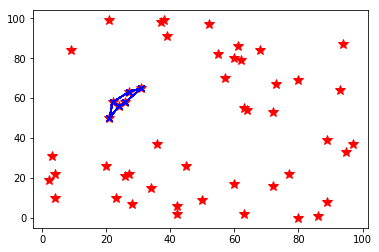

Wall time: 2h 7min 6s


In [132]:
%%time
salesman_ex = exhastive_search_tsp(num_cities=50) 
salesman_ex.generate_all_combination(num_stops= 6)
salesman_ex.compute_optimal_tour()
print ("optimal tour is: ",salesman_ex.optimal_solution)
print ("optimal tour length: ",salesman_ex.optimal_length)
print ("number of iteration is : ",salesman_ex.iteration)
salesman_ex.plot(salesman_ex.optimal_solution)

In [ ]:
### try to compute the 95 % tour

In [22]:
%%time
salesman_ex = exhastive_search_tsp(num_cities=50) 
salesman_ex.generate_all_combination(num_stops= 6)
salesman_ex.compute_optimal_tour()
print ("optimal tour is: ",salesman_ex.optimal_solution)
print ("optimal tour length: ",salesman_ex.optimal_length)
print ("number of iteration is : ",salesman_ex.iteration)
salesman_ex.plot(salesman_ex.optimal_solution)

('Now at iteration: ', 100000000)
('Now at iteration: ', 200000000)
('Now at iteration: ', 300000000)
('Now at iteration: ', 400000000)
('Now at iteration: ', 500000000)
('Now at iteration: ', 600000000)
('Now at iteration: ', 700000000)
('Now at iteration: ', 800000000)
('Now at iteration: ', 900000000)
('Now at iteration: ', 1000000000)


MemoryError: 

### Notice:  To get the 95% , it seems that it will out of memeory ,so that we could only get the approximate 95 percentage tour length (python2.7 only have access to 4GB memeory )  

### Using min-heap data structure can alleivate this problem , but the total number of solutions should be pre-computed ( which is not possibe)

In [ ]:
salesman_ex.all_tour_length.sort()
index = int(len(salesman_ex) * 0.05)
print " 95% of possible solutions: "
print salesman_ex[index]


<h3> T1Q2 (5+5): </h3> 
<ul>
**Explain** what Random Search is and what advantages and disatvantages it would have to use it on the Traveling Salesman. <br>
**Implement** an Random Search to find a solution within the best 95% of possible solutions for a 6 city loop for a traveling salesman with 50 available cities. Log iteration time, walltime and result! Explain the tuning process. <br>
 ** (approx. 50 words) ** <br>
</ul>

*Your text for T1Q2 Here*
...
#### Random Search: advantages: 1. every city has the same opportunity to be selected  so it is fair. 2. Super Easy to implement 3.  The functions are not required to be continuous or differentiable so it can be applied anywhere. 
#### disadvantages: 1. may be very time-comsuming to find the optimal solution. 2.There is no guarantee that  the results will be universal.

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import random
class RandomSearch(object):
    def __init__(self, num_cities=50,num_stops=6):
        # initialize the position of the cities
        random.seed(42)
        gridsize=100
        self.num_cities = num_cities;
        self.num_stops = num_stops;
        #generate pesudo cities
        self.cities = [random.sample(range(gridsize), 2) for x in range(self.num_cities)]
        
        # store all random sampling results 
        self.all_tour=[];
        self.all_tour_length=[];
        
        # store the optimal tour and solution 
        self.optimal_solution = None;
        self.optimal_length = None;
        
        # store the distance matrix 
        self.matrix =[[None for x in range(self.num_cities)] for y in range(self.num_cities)] 
        
        self.iteration = 1;

        
    def run(self,iteration):
        self.init_matrix()
        self.iteration = iteration
        iteration = 0 
        while(iteration < self.iteration):
            tour = random.sample(range(self.num_cities),self.num_stops) # random sampling one tour with no duplicates 
            tour_length = self.tour_length(tour)
            
            self.all_tour.append(tour)
            self.all_tour_length.append(tour_length)
            
            if(not self.optimal_length): # initial the optimal vlue 
                self.optimal_length = tour_length
                self.optimal_solution = tour
            else:
                if(tour_length < self.optimal_length): # compare with the current optimal value 
                    self.optimal_length = tour_length
                    self.optimal_solution = tour
            
            if(iteration % 100000== 0):
                print("Now at iteration: ",iteration)
            iteration += 1;
            
        # print the informatio about the final result     
        print("final iteration: ",self.iteration)
        print ("optimal tour is: ",self.optimal_solution)
        print ("optimal tour length: ",self.optimal_length)
        print("plot the optimal tour:")
        self.plot(self.optimal_solution)     

    def init_matrix(self):
        for row in range(self.num_cities): 
            for col in range(row+1,self.num_cities):
                city_one = self.cities[row];
                city_two = self.cities[col];
                self.matrix[row][col] = np.sqrt((city_one[0] - city_two[0])**2 + (city_one[1] - city_two[1])**2)
                self.matrix[col][row] = self.matrix[row][col]

    def tour_length(self,tour):
        # calculate tour length
        pre = None;
        for cur in tour:# travel all cities 
            if cur == tour[0]:
                #start tour at the start
                traveled_distance = 0
                pre = cur
            else:
                # each travelled leg
                traveled_distance += self.matrix[pre][cur]
                pre= cur
        # return to start
        traveled_distance += self.matrix[pre][tour[0]]
        return traveled_distance
    
    def plot(self, tour=None):
        #plot the tour if you want to
        if tour is not None:
            plt.plot([self.cities[_][0] for _ in range(self.num_cities)],
                     [self.cities[_][1] for _ in range(self.num_cities)],
                     linestyle='',
                     marker='*',
                    markersize=11.0,
                    color=[1,0,0])
            plt.plot([self.cities[tour[_ % self.num_stops]][0] for _ in range(self.num_cities)],
                     [self.cities[tour[_ % self.num_stops]][1] for _ in range(self.num_cities)],
                     'xb-')
            plt.show()
   

('Now at iteration: ', 0)
('Now at iteration: ', 100000)
('Now at iteration: ', 200000)
('Now at iteration: ', 300000)
('Now at iteration: ', 400000)
('Now at iteration: ', 500000)
('Now at iteration: ', 600000)
('Now at iteration: ', 700000)
('Now at iteration: ', 800000)
('Now at iteration: ', 900000)
('Now at iteration: ', 1000000)
('Now at iteration: ', 1100000)
('Now at iteration: ', 1200000)
('Now at iteration: ', 1300000)
('Now at iteration: ', 1400000)
('Now at iteration: ', 1500000)
('Now at iteration: ', 1600000)
('Now at iteration: ', 1700000)
('Now at iteration: ', 1800000)
('Now at iteration: ', 1900000)
('final iteration: ', 2000000)
('optimal tour is: ', [14, 45, 48, 29, 37, 17])
('optimal tour length: ', 68.883459084947532)
plot the optimal tour:


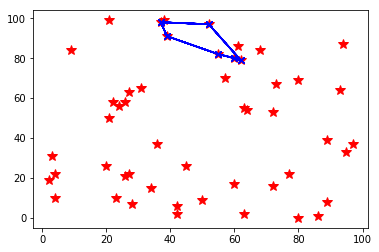

Wall time: 32.2 s


In [18]:
%%time
random_search = RandomSearch(num_cities=50) 
random_search.run(2000000)

<h3> T1Q3 (5+5): </h3> 
<ul>
**Compare** the two search methods based on the required logged variables, and any additional logs you implemented. <br>
    Be sure to use the same initialization of salesman for this comparison. <br>
    **Explain** why the two other search methods from assignment one cannot be applied here. <br>
    **(approx. 100 words)** <br>

*Your text for T1Q3 Here*
...

#### This is because here for tsp problem , we cannot compute gradient here. The problem here is in integer domain．The tsp optimization problem cannot be released to linear programming problem. Secondly, this is a combintorial optmization problem , it is not for finding one point. Here, the goal is to find a optimal combination.

<h2> Task 2: Genetic Algorithm </h2>
In this task, you will explain and implement a Genetic Algorithm. You will assess the expected performance of this algorithm compared to the benchmarks.
    <h3> T2Q1 (13): </h3>
    <ul>
    **Explain** how a Genetic Algorithm works and indicate how you plan to go about implementing it. <br>
    Assess the expected performance in terms of walltime and iteration number for the desired results (minimum top 95th percentile). <br>
    **(approx. 100 words)**

T2Q1 :

#### Basically, genetic algorithm tends to mimic the human evolution to some extent. Firstly, initial population is defined. Then we defined to compute whether a gene is good or not(fitness). Then, we selected good gene to generate their off-springs.And finally, these off-springs replace the bad gene among the population and this process repeats. To implement the ga algorithm, we need to define three classes, one for defining the GA class with initPopulation, cross,mutation, generate new child methods,  one for defining the gene Life and the third one for difining distance and run the codes.The expeced performance would be to get the desired results within 10 second. cos the coverange rate of Ga algorihtm is pretty good. 




<h3> T2Q2 (12): </h3>
<ul>
**Implement** the Genetic Algorithm in Python Code. <br>
Marks are rewarded for code functionality and readability (consistent and useful naming, comments, code formatting). <br>
Log iteration time, walltime and results. <br>
</ul>

<h3> Bonus (10): </h3>
<ul>
**Tune** the Genetic Algorithm to achieve as efficient results as possible. <br>
To do this you can adjust hyperparameters, alter the search in minor ways and improve code efficiency. <br>
The points will be awarded in context to your other colleagues’ improvements. <br>
</ul>


In [1]:
# Your Code for T2Q2 Here
import random
class GA(object):
    """generic algorithm """
    def __init__(self, aCrossRate, aMutationRate, aLifeCount, aGeneLength, aMatchFun = lambda life : 1):
        self.crossRate = aCrossRate               #cross rate 
        self.mutationRate = aMutationRate         #mutationRate proabbility 
        self.lifeCount = aLifeCount               # selecting from how many available gene 100
        self.geneLength = aGeneLength             # 6 city loop 
        self.matchFun = aMatchFun                 # nothing
        self.lives = []                           # store all lives 
        self.best = None                          # store the best one among one genration 
        self.generation = 1                       # generation iteration 
        self.crossCount = 0                       # count for cross 
        self.mutationCount = 0                    # count for mutation 
        self.bounds = 0.0                         
        self.initPopulation()                     

    def initPopulation(self):
        """initilize Population"""
        self.lives = []
        for i in range(self.lifeCount):
            #gene = [0,1,…… ,self.geneLength-1]
            # the length of the gene is 6, random sampling from 50 cities. 
            gene = random.sample(range(50),self.geneLength)
            life = Life(gene)
            #append to lives group 
            self.lives.append(life)

    def is_valid_gene(self,gene):
        '''
        make sure : duplicates are not allowed 
        '''
        if len(gene)!=len(set(gene)): # have duplicates
            return False
        else:
            return True
 
    def judge(self):
        """judge score """
        # bound
        self.bounds = 0.0
        # assume the best one is the first one 
        self.best = self.lives[0]

        for life in self.lives: #iterate all lives 
            life.score = self.matchFun(life)
            self.bounds += life.score
            # if the new one is better then the current one, update it
            if self.best.score < life.score:
                self.best = life
 
 
    def cross(self, parent1, parent2):
        """Cross"""

        ##setting the crossing index 
        index1 = random.randint(0, self.geneLength - 1)
        index2 = random.randint(index1, self.geneLength - 1)
        tempGene = parent2.gene[index1:index2]       #Crossed gene fragments  
        condition = False 
        newGene = []
        while(not condition):
            del newGene[:] # clear it up if it is not valid
            p1len = 0
            for g in parent1.gene:
                if len(newGene) == self.geneLength: #boundary case, stop crossing 
                    break
                if p1len == index1:
                    newGene.extend(tempGene)   #insert gene segment 
                    p1len += 1
                if g not in tempGene:  
                    newGene.append(g)
                    p1len += 1
            condition =  self.is_valid_gene(newGene) # untill no duplicates 
        self.crossCount += 1
        return newGene
 
 
    def  mutation(self, gene):
        """mutation"""
        index = random.randint(0, self.geneLength - 1)
        condition = False
        while(not condition):
            gene[index] =  random.sample(range(50),1)[0] # generate one random number from 0~50(exclusive)
            condition = self.is_valid_gene(gene) # no duplicates 

        self.mutationCount += 1
        return gene
 
 
    def getOne(self):
        r = random.uniform(0, self.bounds)
        for life in self.lives:
            r -= life.score
            if r <= 0:
                return life

 
    def newChild(self):
        parent1 = self.getOne()
        rate = random.random()

        if rate < self.crossRate:
            parent2 = self.getOne()
            gene = self.cross(parent1, parent2)
        else:
            gene = parent1.gene

        rate = random.random()
        if rate < self.mutationRate:
            gene = self.mutation(gene)

        return Life(gene)
 
 
    def next(self):
        self.judge()
        newLives = []
        newLives.append(self.best)
        while len(newLives) < self.lifeCount:
            newLives.append(self.newChild())
        self.lives = newLives
        self.generation += 1

In [381]:

SCORE_NONE = -1 #default value 
 
class Life(object):
    """Life class """
    def __init__(self, aGene = None):
        self.gene = aGene
        self.score = SCORE_NONE

In [400]:
class TSP(object):
    def __init__(self, aLifeCount = 100,num_cities= 50,num_stops=6):
        self.num_cities = num_cities;
        self.initCities()
        self.lifeCount = aLifeCount
        self.trace = []
        self.iter = 0
        self.ga = GA(aCrossRate = 0.7, 
              aMutationRate = 0.02,
              aLifeCount = self.lifeCount, 
              aGeneLength = num_stops,
              aMatchFun = self.matchFun())
        
 
    # generate cities 
    def initCities(self):
        random.seed(42)
        gridsize=100
        #generate pesudo cities
        self.cities = [random.sample(range(gridsize), 2) for x in range(self.num_cities)]
 
    def tour_length(self,tour):
        # calculate tour length
        visited_cities = [self.cities[_] for _ in tour]
        for city in visited_cities:
            if city == visited_cities[0]:
                #start tour at the start
                traveled_distance = 0
                location = city
            else:
                # each travelled leg
                traveled_distance += np.sqrt((location[0] - city[0])**2 + (location[1] - city[1])**2)
                location = city
          # return to start
        traveled_distance += np.sqrt((visited_cities[0][0] - city[0])**2 + (visited_cities[0][1] - city[1])**2)
        return traveled_distance
    
      # mathch function，to get the minimal length. 
    def matchFun(self):
        return lambda life: 1.0 / self.tour_length(life.gene)
    
    def printResult(self):
        '''
        plot the result of the differential evolution algorithm
        '''
        x = np.arange(0, self.iter) #x-axis: number of iteration
        y1 = self.trace # optimal trace 
        plt.plot(x, y1, 'r', label='optimal value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Generic Algorithm  Algorithm for TSP optimization")
        plt.legend()
        plt.show()
 
 
    def run(self, iter = 100):
        self.iter = iter
        while iter > 0:
            self.ga.next()
            tour_length = self.tour_length(self.ga.best.gene)
            if(self.ga.generation % 20 == 0):
                print (("Generation %d : the current optimal value is:%f") % (self.ga.generation, tour_length))
                print self.ga.best.gene
            self.trace.append(tour_length)
            iter -= 1
        print "After %d generations,the best reuslt is: %f"%(self.ga.generation, tour_length)
        print "The travelling path is ：",
        print self.ga.best.gene 

In [401]:
tsp = TSP()

Generation 20 : the current optimal value is:131.468630
[8, 23, 19, 18, 31, 48]
Generation 40 : the current optimal value is:110.505809
[19, 8, 23, 18, 31, 45]
Generation 60 : the current optimal value is:108.242352
[19, 8, 23, 36, 31, 45]
Generation 80 : the current optimal value is:97.383282
[19, 36, 23, 18, 31, 45]
Generation 100 : the current optimal value is:97.082095
[19, 36, 23, 17, 18, 31]
Generation 120 : the current optimal value is:96.984568
[19, 23, 36, 17, 18, 31]
Generation 140 : the current optimal value is:92.147563
[19, 8, 40, 23, 36, 17]
Generation 160 : the current optimal value is:78.634281
[19, 40, 8, 39, 23, 36]
Generation 180 : the current optimal value is:76.918003
[19, 40, 39, 8, 23, 36]
Generation 200 : the current optimal value is:76.918003
[19, 40, 39, 8, 23, 36]
Generation 220 : the current optimal value is:44.661796
[5, 40, 39, 8, 23, 36]
Generation 240 : the current optimal value is:37.744418
[40, 39, 5, 8, 23, 36]
Generation 260 : the current optimal val

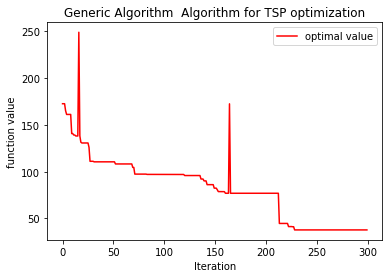

Wall time: 3.36 s


In [402]:
%%time
tsp.run(300)
tsp.printResult()

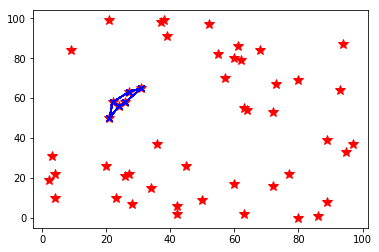

('length of first tour: ', 37.744417839451785)


In [389]:
salesman.new_tour(tour = tsp.ga.best.gene) # assign a new tour to the TS, plot and calculate length
salesman.plot()
print("length of optimal tour: ", salesman.tour_length())

*Your text detailing the tuning process here*
...
#### The  mutation rate determines how wide you exploration space is. If the algorithm converge too slow, decreasing the mutation rate. And on the other hand, cross over rate will help you focus in local information. In the tunning process, my algorithm misses the optimal value so that i increase this value a little bit.  Plus, i found the popultion size parameter is not as sensitive as these two parameters to the performance.

<h2> Task 3: Differential Evolution </h2>
In this task, you will explain and implement a Differential Evolution Algorithm. You will assess the expected performance of this algorithm compared to the benchmarks.
    <h3> T3Q1 (13): </h3>
    <ul>
    **Explain** how a Differential Evolution Algorithm works and indicate how you plan to go about implementing it. <br>
    Assess the expected performance in terms of walltime and iteration number for the desired results (minimum top 95th percentile). <br>
    **(approx. 100 words)**

T3Q1

The Differential Evolution algorithm is quite similar to the GA algorihtm. The biggest differnce between ga algorihtm and de algorihtm is their mutation function. The downside of ga algorithm is that ga does not  support real valued (float values) fitness functions. That is why Differential Evolution Algorithm comes out. For mutation operation, we need to select three individuals x1,x2 ,x3 from the current generation with no duplicates.  we subtract individuals x2 and x3 from each other ,and multiply the differentece by the scaling factore and then add to the individual x1 to get the new gene ,if the element is out of boundary, we need to assign a new random number within the range. The whole procedure will be 1. initialize a random population of individuals throughout the search space  2. perform  mutation,crossover and selection  3. repeat step 1 and step2 until the stopping criteria has met.  

Since the crossover function in Differential Evolution Algorithm is not as efficient as ga algorithm, so the expected time to get the desired results would be 1 to 5 minutes. 

<h3> T3Q2 (12): </h3>
<ul>
**Implement** the Differential Evolution Algorithm in Python Code. <br>
Marks are rewarded for code functionality and readability (consistent and useful naming, comments, code formatting). <br>
Log iteration time, walltime and results. <br>
</ul>

<h3> Bonus (10): </h3>
<ul>
**Tune** the Differential Evolution Algorithm to achieve as efficient results as possible. <br>
To do this you can adjust hyperparameters, alter the search in minor ways and improve code efficiency. <br>
The points will be awarded in context to your other colleagues’ improvements. <br>
</ul>


In [358]:
class ObjFunction(object):
    def __init__(self,var_dim,bound):
        self.vardim= var_dim #6
        self.bound =bound # 50
        self.initCities() # call this function only once. 
        
    def initCities(self):
        print "RUN HERE initCities"
        random.seed(42)
        gridsize= 100 #TODO:100 
        #generate pesudo cities
        self.cities = [random.sample(range(100), 2) for x in range(self.bound)]
        
    def tour_length(self,tour):
        # calculate tour length
        visited_cities = [self.cities[_] for _ in tour]
        for city in visited_cities:
            if city == visited_cities[0]:
                #start tour at the start
                traveled_distance = 0
                location = city
            else:
                # each travelled leg
                traveled_distance += np.sqrt((location[0] - city[0])**2 + (location[1] - city[1])**2)
                location = city
          # return to start
        traveled_distance += np.sqrt((visited_cities[0][0] - city[0])**2 + (visited_cities[0][1] - city[1])**2)
        return traveled_distance
    
    def GrieFunc(self,de_individual):
        '''
            compute the fitness value
        '''
        return 1.0/self.tour_length(de_individual.chrom);
        

In [359]:
class DEIndividual(object):

    '''
    individual of differential evolution algorithm
    '''

    def __init__(self,  var_dim, bound):
        '''
        parameters: 
        vardim: dimension of variables
        bound: boundaries of variables
        '''
        self.vardim = var_dim # 6 cities 
        self.bound = bound # 50 in our problem 
        self.fitness = 0.0
    
    
    def generate(self):
        '''
        generate a random chromsome for differential evolution algorithm
        '''
        #gene = [0,1,…… ,self.geneLength-1]
        # the length of the gene is 6, random sampling from 50 cities. 
        self.chrom = random.sample(range(self.bound),self.vardim)


In [372]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt


class DE(object):

    '''
    The class for differential evolution algorithm
    '''

    def __init__(self, size_pop, var_dim, bound, MAX_GEN, params):
        '''
        size_pop: population size_pop
        var_dim: dimension of variables
        bound: boundaries of variables
        MAX_GEN: termination condition(maximum generation, CONSTANT )
        param: algorithm required parameters, it is a list which is consisting of [crossover rate CR, scaling factor F]
                    # scaling factor F 
        '''
        self.sizepop = size_pop
        self.MAXGEN = MAX_GEN
        self.vardim = var_dim
        self.bound = bound
        self.population = []
        self.fitness = np.zeros((self.sizepop, 1)) 
        self.trace = np.zeros((self.MAXGEN, 1))
        self.params = params
        self.object_function = ObjFunction(var_dim,bound); # initialize the objective function 

    def initialize(self):
        '''
        initialize the population with poplation size : self.sizepop
        '''
        for i in xrange(0, self.sizepop):
            ind = DEIndividual(self.vardim, self.bound) # create instances 
            ind.generate()
            self.population.append(ind)

    def evaluate(self, x):
        '''
        param: x -- instance of DEIndividual
        evaluation of the population fitnesses
        '''
        return self.object_function.GrieFunc(x)
    
    def is_valid_chrom(self,chrom):
        if len(chrom)!=len(set(chrom)): # have duplicates
            return False
        else:
            return True
        
    def solve(self):
        '''
        evolution process of differential evolution algorithm
        '''
        self.t = 0 # iteration counter 
        self.initialize()
        # compute the fitnesses 
        for i in xrange(0, self.sizepop):
            self.population[i].fitness = self.evaluate(self.population[i]) # assign new value 
            self.fitness[i] = self.population[i].fitness
        # find the optimal fitness 
        best = np.max(self.fitness)
        # find the corresponding index 
        bestIndex = np.argmax(self.fitness)
        # make a deep copy 
        self.best = copy.deepcopy(self.population[bestIndex])
        # update the trace. 
        self.trace[self.t, 0] =1.0/self.best.fitness # 1st  
        print("Generation %d: optimal function value is: %f;" % (self.t, self.trace[self.t, 0]))
        
        while (self.t < self.MAXGEN - 1):
            self.t += 1
            # mutation and crossover iteratively 
            for i in xrange(0, self.sizepop):
                vi = self.mutationOperation(i)
                ui = self.crossoverOperation(i, vi)
                xi_next = self.selectionOperation(i, ui)
                self.population[i] = xi_next
            # evaluate fitness after each iteration 
            for i in xrange(0, self.sizepop):
                self.evaluate(self.population[i])
                self.fitness[i] = self.population[i].fitness
            # find the best one and its index 
            best = np.max(self.fitness)
            bestIndex = np.argmax(self.fitness)
            # update if the current is the best 
            if best > self.best.fitness:
                self.best = copy.deepcopy(self.population[bestIndex])
            # TODO: can be changed to 1.0/ self.best.fitness
            self.trace[self.t, 0] =  1.0/ self.best.fitness
            if self.t % 300 ==0:
                print("Generation %d: optimal function value is: %f;" % (self.t, self.trace[self.t, 0]))
        
        print "---DE algoritm terminates after %d loop----"%self.MAXGEN
        print "Fianl Optimal function value is: %f;"%self.trace[self.t, 0]
        print "Final Optimal solution is:"
        print self.best.chrom
        self.printResult() # plot the trace 
    
    
    def selectionOperation(self, i, ui):
        '''
        selection operation for differential evolution algorithm
        '''
        
        xi_next = copy.deepcopy(self.population[i])
        xi_next.chrom = ui
        xi_next.fitness = self.evaluate(xi_next)
        if xi_next.fitness > self.population[i].fitness:
            return xi_next
        else:
            return self.population[i]

    def crossoverOperation(self, i, vi):
        '''
        parameter
        crossover operation for differential evolution algorithm
        '''
        ui = list(np.zeros(self.vardim))
        condition = False
        while(not condition):
            ui = list(np.zeros(self.vardim))
            k = np.random.random_integers(0, self.vardim - 1)
            for j in xrange(0, self.vardim):
                pick = random.random() # generate a probability in range [0,1)
                if pick < self.params[0] or j == k: # if it is smaller than the  crossover rate CR probability 
                    ui[j] = vi[j]
                else:
                    ui[j] = self.population[i].chrom[j] # cross over
            
            condition = self.is_valid_chrom(ui)
        return ui

    def mutationOperation(self, i):
        '''
        parameter i : the i-th parent life 
        mutation operation for differential evolution algorithm
        '''
        vi = []
        condition = False
        while(not condition):
            del vi[:]
            # generate three random number a, b,c (a != b != c != i )
            a = np.random.random_integers(0, self.sizepop - 1)
            while a == i:
                a = np.random.random_integers(0, self.sizepop - 1)
                
            b = np.random.random_integers(0, self.sizepop - 1)
            while b == i or b == a:
                b = np.random.random_integers(0, self.sizepop - 1)
                
            c = np.random.random_integers(0, self.sizepop - 1)
            while c == i or c == b or c == a:
                c = np.random.random_integers(0, self.sizepop - 1)
            
            temp = list(map(lambda x: self.params[1] *(x[0]-x[1]), zip(self.population[a].chrom, self.population[b].chrom))) 

            vi = list(map(lambda x: x[0]+x[1],zip(self.population[c].chrom,temp)))
            assert (len(vi) == self.vardim)
            vi = list(vi)
            vi = [int(x) for x in vi] # only get the integer part 
            for j in xrange(0, self.vardim): # bound [0,bound) exclusive 
                if vi[j] < 0:   
                    vi[j] = np.random.random_integers(0,self.bound/10) # out of boundary 
                if vi[j] >= self.bound: # bound =50
                    vi[j] = np.random.random_integers(self.bound-self.bound/10+1, self.bound-1)
            condition = self.is_valid_chrom(vi) # make sure no duplicates 
        return vi

    def printResult(self):
        '''
        plot the result of the differential evolution algorithm
        '''
        x = np.arange(0, self.MAXGEN) #x-axis: number of iteration
        y1 = self.trace[:, 0] # optimal trace 
        plt.plot(x, y1, 'r', label='optimal value')
        plt.xlabel("Iteration")
        plt.ylabel("function value")
        plt.title("Differential Evolution Algorithm for function optimization")
        plt.legend()
        plt.show()

In [378]:
dea = DE(size_pop=100,var_dim=6, bound=50,MAX_GEN = 6000,params =[0.35,  0.5]) 

RUN HERE initCities


Generation 0: optimal function value is: 172.612072;
Generation 300: optimal function value is: 63.825545;
Generation 600: optimal function value is: 43.107591;
Generation 900: optimal function value is: 43.107591;
Generation 1200: optimal function value is: 43.107591;
Generation 1500: optimal function value is: 43.107591;
Generation 1800: optimal function value is: 43.107591;
Generation 2100: optimal function value is: 40.928913;
Generation 2400: optimal function value is: 40.928913;
Generation 2700: optimal function value is: 40.928913;
Generation 3000: optimal function value is: 40.928913;
Generation 3300: optimal function value is: 40.928913;
Generation 3600: optimal function value is: 40.928913;
Generation 3900: optimal function value is: 40.928913;
Generation 4200: optimal function value is: 40.928913;
Generation 4500: optimal function value is: 37.744418;
Generation 4800: optimal function value is: 37.744418;
Generation 5100: optimal function value is: 37.744418;
Generation 5400

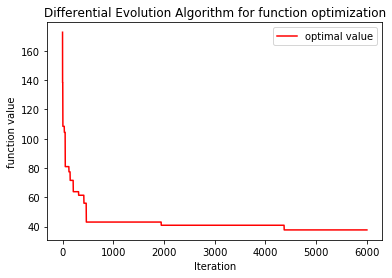

Wall time: 2min 47s


In [379]:
%%time
import warnings
warnings.filterwarnings('ignore')
dea.solve()

*Your text detailing the tuning process here*
...

#### The scaling factor F determines how large your converage rate is. The larger scaling factor you are, you are going to converge fast. It helps to get a  better global optimal solution. The smaller the parameter is, it would help you get a more accurate local optimal. I think scaling factor around 0.5 would be a good choice. For crossover rate CR, the larger the crossover rate is, the information exchange would be more,it has the effect to control the converage rate, I found that the parameter around 0.3 will lead to a good result. 

<h2> Task 4: Comparison (20) </h2>
<ul>
Run all four search methods on the same traveling saleman, searching for the best 6-city loop of a 50 city selection. <br>
Make sure you run all optimization methods on the same initialization with the same city locations! <br>
Compare the performances of all four algorithms against each other. <br>
Consider factors such as walltime, iteration efficiency, result quality, consistence and ease of implementation. <br>
How well does this match up with the expected performance, what if anything did you find surprising? <br>
</ul>




Summary: The exhaustive search algorithm is the most time-consuming one.The most efficient algorithm is the GA algorithm. The eaist one to implement is the random search algorithm. The DE algorithm is not as efficient as the ga algorithm mainly because the crossover operation is suitable for float number, but for tsp problem, the numbers in the search space are all integers. To get an efficient exhaustive search  search algorithm,  some small tricks need to be applied so I think this one is the hardest one for implementation. For de and ga algorithm, the most challenging thing here is OOD design ( how you define each class and design the methods within each class) 